In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv('student_clustering.csv')

In [5]:
data.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


<Axes: xlabel='cgpa', ylabel='iq'>

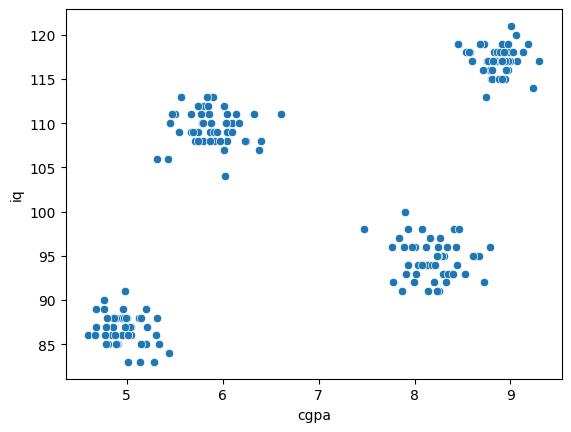

In [10]:
sns.scatterplot(x='cgpa', y='iq', data=data)

In [12]:
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data)
    wcss.append(km.inertia_)

In [13]:
wcss

[29957.898288,
 4184.14127,
 2364.005583420083,
 681.96966,
 613.6615476825398,
 395.9605877691832,
 312.07433123604454,
 260.1227011760185,
 216.158585701651,
 204.96767331671515]

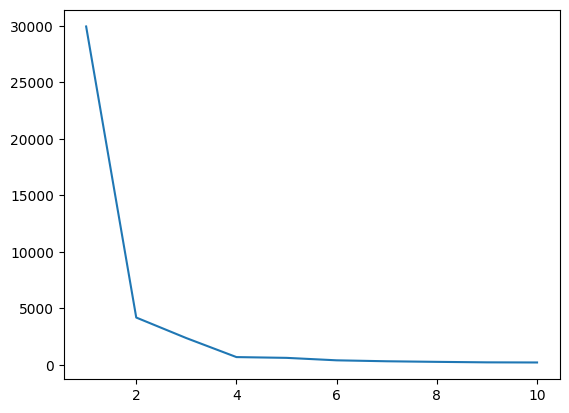

In [14]:
plt.plot(range(1, 11), wcss)

In [18]:
X = data.iloc[:, :].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [19]:
y_means

array([3, 2, 0, 0, 2, 2, 0, 1, 2, 0, 3, 2, 0, 3, 2, 0, 2, 0, 2, 2, 0, 3,
       0, 3, 3, 0, 3, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 3, 2, 3, 0, 0, 3,
       1, 1, 0, 2, 1, 2, 3, 3, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 3, 1,
       0, 3, 2, 0, 2, 1, 0, 3, 2, 1, 2, 1, 3, 0, 0, 1, 2, 3, 1, 3, 1, 2,
       1, 2, 1, 1, 0, 3, 0, 0, 1, 0, 3, 1, 2, 3, 3, 1, 3, 3, 0, 3, 1, 1,
       0, 1, 2, 2, 0, 1, 0, 2, 1, 3, 3, 2, 0, 1, 0, 3, 0, 2, 3, 0, 0, 2,
       3, 3, 2, 1, 2, 3, 0, 0, 0, 3, 2, 3, 3, 1, 3, 1, 2, 3, 1, 3, 1, 1,
       3, 0, 2, 1, 2, 0, 3, 1, 2, 0, 1, 3, 2, 3, 3, 1, 1, 2, 1, 3, 3, 0,
       1, 2, 3, 1, 1, 2, 2, 2, 0, 3, 0, 0, 1, 2, 0, 0, 3, 3, 0, 3, 1, 2,
       2, 1])

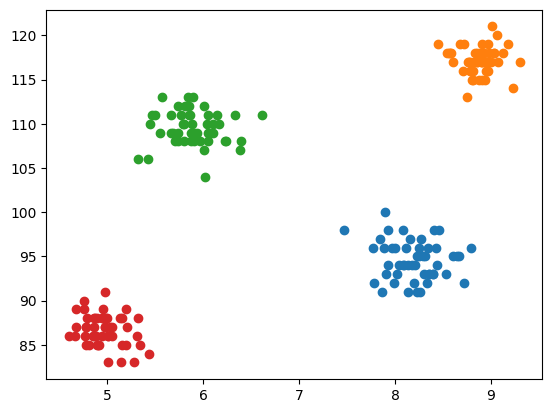

In [20]:
plt.scatter(X[y_means==0, 0], X[y_means==0, 1])
plt.scatter(X[y_means==1, 0], X[y_means==1, 1])
plt.scatter(X[y_means==2, 0], X[y_means==2, 1])
plt.scatter(X[y_means==3, 0], X[y_means==3, 1])


In [30]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [31]:
X[:5]

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ]])

In [32]:
y[:5]

array([1, 3, 0, 1, 3])

In [42]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [52]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [53]:
import plotly.express as px

fig = px.scatter_3d(x = X[:, 0], y=X[:, 1], z=X[:, 2])
fig.show()

In [34]:
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

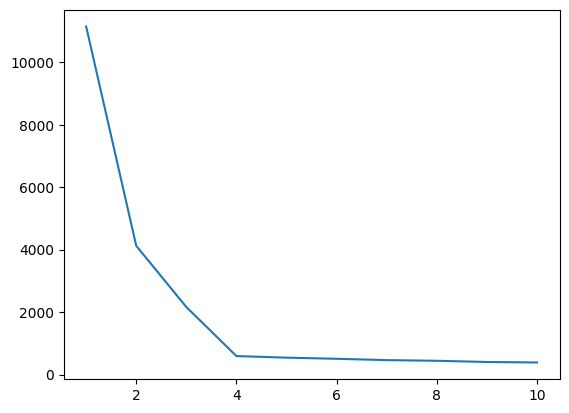

In [35]:
plt.plot(range(1, 11), wcss)    

In [36]:
k = KMeans(n_clusters=4)
y_pred = k.fit_predict(X)

In [37]:
df = pd.DataFrame()
df['1'] = X[:, 0]
df['2'] = X[:, 1]
df['3'] = X[:, 2]
df['label'] = y_pred

In [54]:
fig = px.scatter_3d(df, x='1', y='2', z='3', color='label')
fig.show()